In [90]:
# uncomment the install.packages if needed
# install.packages('dplyr')
# install.packages('udpipe')
# install.packages('ggplot2')
# install.packages('lattice')
# install.packages('igraph')
# install.packages('ggraph')
# install.packages("circlize", repos='http://cran.us.r-project.org')
# install.packages('tidytext')
# install.packages('stringr')
# install.packages('tidyr')
# install.packages('wordcloud')
# install.packages('reshape2')
# install.packages('topicmodels')

# libraries
library(dplyr) # for easy editing
library(udpipe) # for POS tagging
library(ggplot2) # for graphing
library(lattice) # more data viz
library(igraph) # for network cooccurrence graphs
library(ggraph) # for network cooccurrence graphs
library(circlize) # for chord diagrams
library(tidytext) # contains sentiment lexicons
library(stringr) # for text analysis
library(tidyr) # for text analysis
library(wordcloud) # for making wordclouds
library(reshape2) # for reshaping wordclouds
library(topicmodels) # for LDA



also installing the dependencies ‘NLP’, ‘modeltools’, ‘slam’, ‘tm’





The downloaded binary packages are in
	/var/folders/vf/nvtmc9rs14z0ws4qlk6hszf80000gn/T//RtmpWpJFUk/downloaded_packages


In [2]:
#### Stanford Encyclopedia of Philosophy (SEP) entry url recommendations based on keywords

In [3]:
# import Stanford Encyclopedia of Philosophy (SEP) urls
sep_urls <- read.csv('data/encyclo_titles.csv', sep="\t", header = TRUE)

In [4]:
# rename col and drop unneeded col
sep_urls = rename(sep_urls, keyword_in_essay = X1)
sep_urls = sep_urls %>% 
  select(keyword_in_essay, urls)
head(sep_urls)

keyword_in_essay,urls
<fct>,<fct>
abduction,https://plato.stanford.edu/entries/abduction/
abelard,https://plato.stanford.edu/entries/abelard/
abhidharma,https://plato.stanford.edu/entries/abhidharma/
abilities,https://plato.stanford.edu/entries/abilities/
abner burgos,https://plato.stanford.edu/entries/abner-burgos/
abrabanel,https://plato.stanford.edu/entries/abrabanel/


In [5]:
# import Stanford Encyclopedia of Philosophy (SEP) entry recommendations based on keywords
# in the philosophy essay (e.g., nagel_bat.txt) here
sep_recs <- read.table('data/sep_recs.txt')
sep_recs = rename(sep_recs, keyword_in_essay = V1) # rename column
head(sep_recs)

keyword_in_essay
<fct>
categories
privacy
events
identity
death
turing


In [6]:
#### RESULT # 1
# Here are Stanford Encyclopedia of Philosophy article recommendations based on
# proper noun keywords found in the inputted philosophy essay (e.g., nagel_bat.txt)

oldw <- getOption("warn") # exclude warnings
options(warn = -1)

sep_recs = sep_recs %>% inner_join(sep_urls)
sep_recs = sep_recs[!duplicated(sep_recs), ]
write.csv(sep_recs,"results/encyclopedia_recommendations.csv")
print(sep_recs)

options(warn = oldw) # turn warnings back on

Joining, by = "keyword_in_essay"



   keyword_in_essay                                              urls
1        categories    https://plato.stanford.edu/entries/categories/
2           privacy       https://plato.stanford.edu/entries/privacy/
3            events        https://plato.stanford.edu/entries/events/
4          identity      https://plato.stanford.edu/entries/identity/
5             death         https://plato.stanford.edu/entries/death/
6            turing        https://plato.stanford.edu/entries/turing/
7       metaphysics   https://plato.stanford.edu/entries/metaphysics/
8             david         https://plato.stanford.edu/entries/david/
10          realism       https://plato.stanford.edu/entries/realism/
11         davidson      https://plato.stanford.edu/entries/davidson/
12      physicalism   https://plato.stanford.edu/entries/physicalism/
14            rorty         https://plato.stanford.edu/entries/rorty/
15    consciousness https://plato.stanford.edu/entries/consciousness/


In [7]:
### PARTS OF SPEECH ANALYSIS OF PHILOSOPHY ESSAY

In [8]:
# read in philosophy essay (e.g., nagel_bat.txt) for parts-of-speech (POS) analysis
essay <- read.table('data/nagel_bat.txt', sep="\t", header = TRUE)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”


In [9]:
# download udpipe's english model for POS tagging, etc.

# if running for the first time, UNCOMMENT this line below
# model <- udpipe_download_model(language = "english") 
# check for the udpipe file in your directory, you may need to edit the file name below
udmodel_english <- udpipe_load_model(file = 'english-ewt-ud-2.4-190531.udpipe')

In [10]:
# edit depending on input
s <- udpipe_annotate(udmodel_english, essay$Philosophical.Review)
x <- data.frame(s)

pdf 
  2

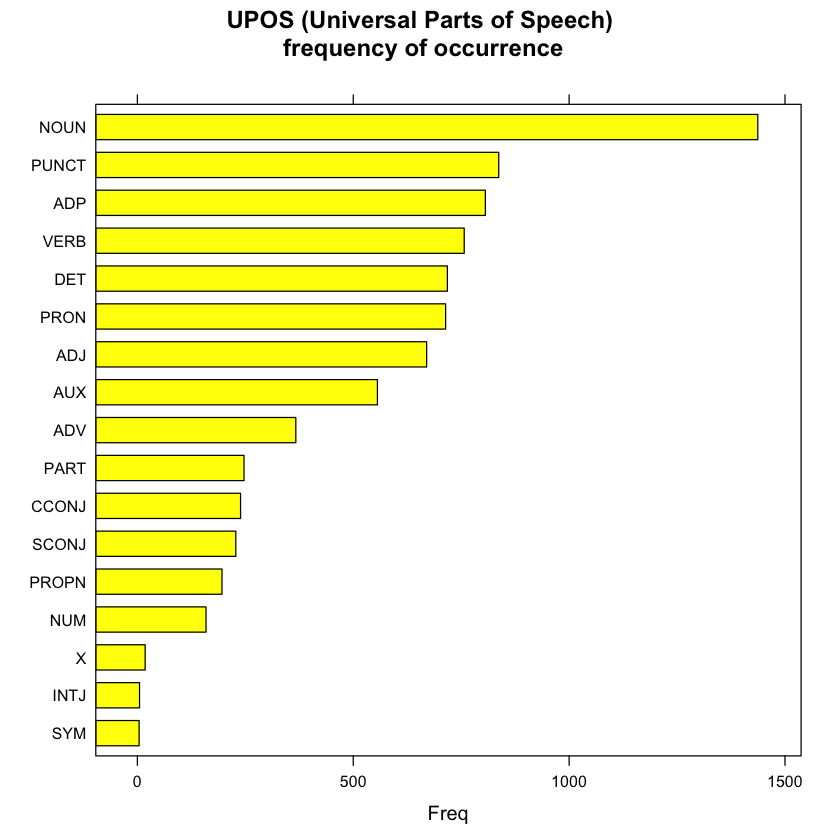

In [11]:
#### RESULTS 2: POS FREQUENCIES
# parts of speech distribution of article
# e.g., nagel_bat.txt is mostly made up of nouns
stats <- txt_freq(x$upos)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = stats, col = "yellow", 
         main = "UPOS (Universal Parts of Speech)\n frequency of occurrence", 
         xlab = "Freq")

# write graph to image
png(filename="results/essay_bar_pos_freq.png")
barchart(key ~ freq, data = stats, col = "yellow", 
         main = "UPOS (Universal Parts of Speech)\n frequency of occurrence", 
         xlab = "Freq")
dev.off()

pdf 
  2

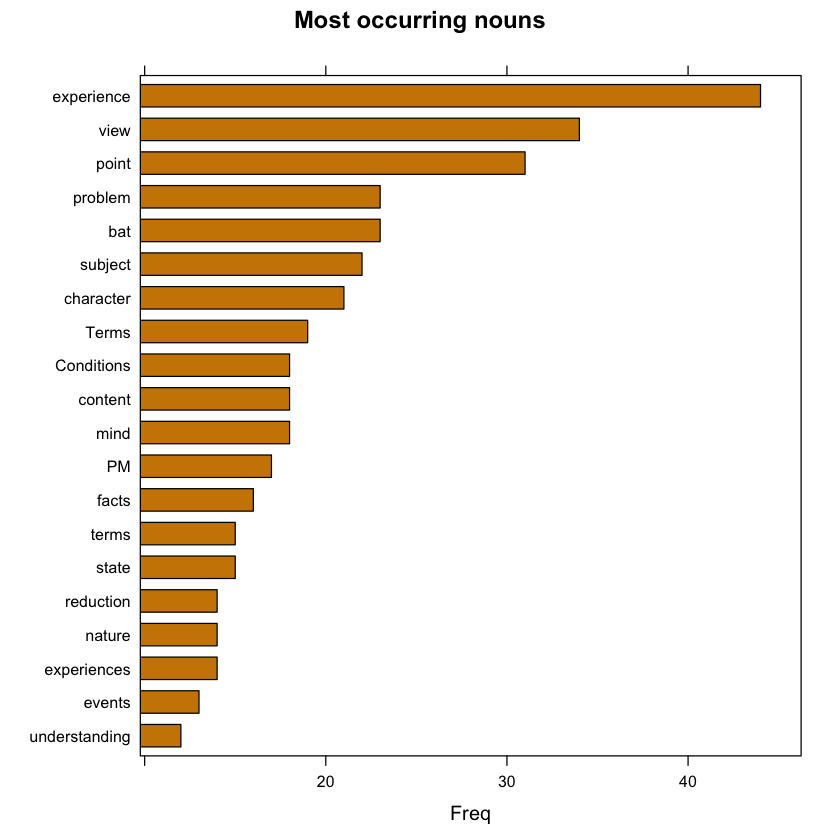

In [12]:
# Top most occurring nouns
stats <- subset(x, upos %in% c("NOUN")) 
stats <- txt_freq(stats$token)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = head(stats, 20), col = "orange3", 
         main = "Most occurring nouns", xlab = "Freq")

# write graph to image
png(filename="results/essay_bar_tf_nouns.png")
barchart(key ~ freq, data = head(stats, 20), col = "orange3", 
         main = "Most occurring nouns", xlab = "Freq")
dev.off()

pdf 
  2

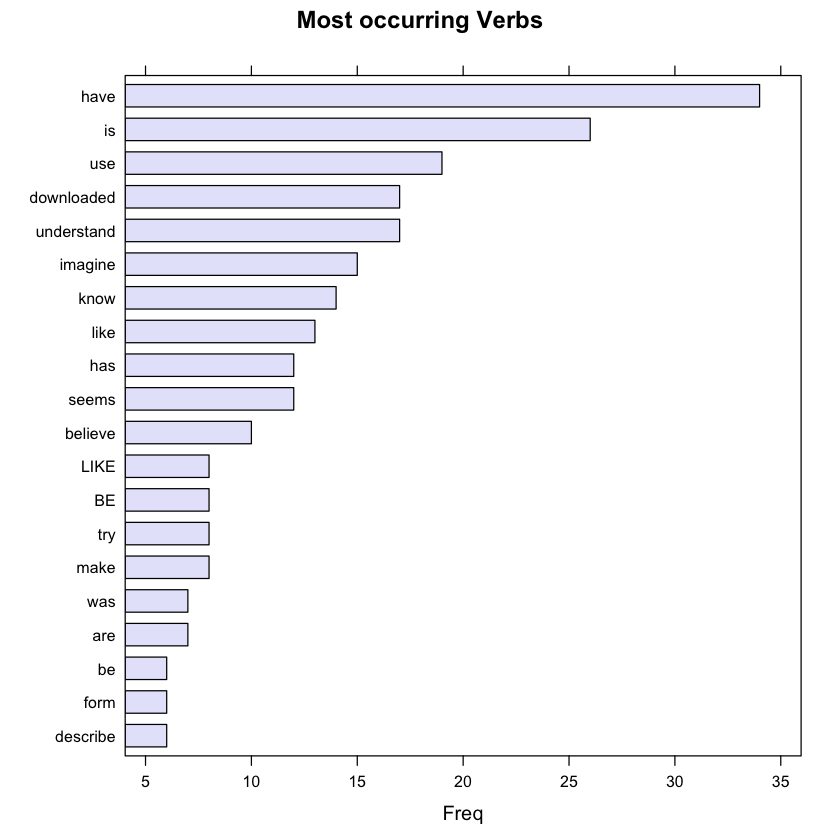

In [13]:
## Top most occurring verbs
stats <- subset(x, upos %in% c("VERB")) 
stats <- txt_freq(stats$token)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = head(stats, 20), col = "lavender", 
         main = "Most occurring Verbs", xlab = "Freq")

# write graph to image
png(filename="results/essay_bar_tf_verbs.png")
barchart(key ~ freq, data = head(stats, 20), col = "lavender", 
         main = "Most occurring Verbs", xlab = "Freq")
dev.off()

pdf 
  2

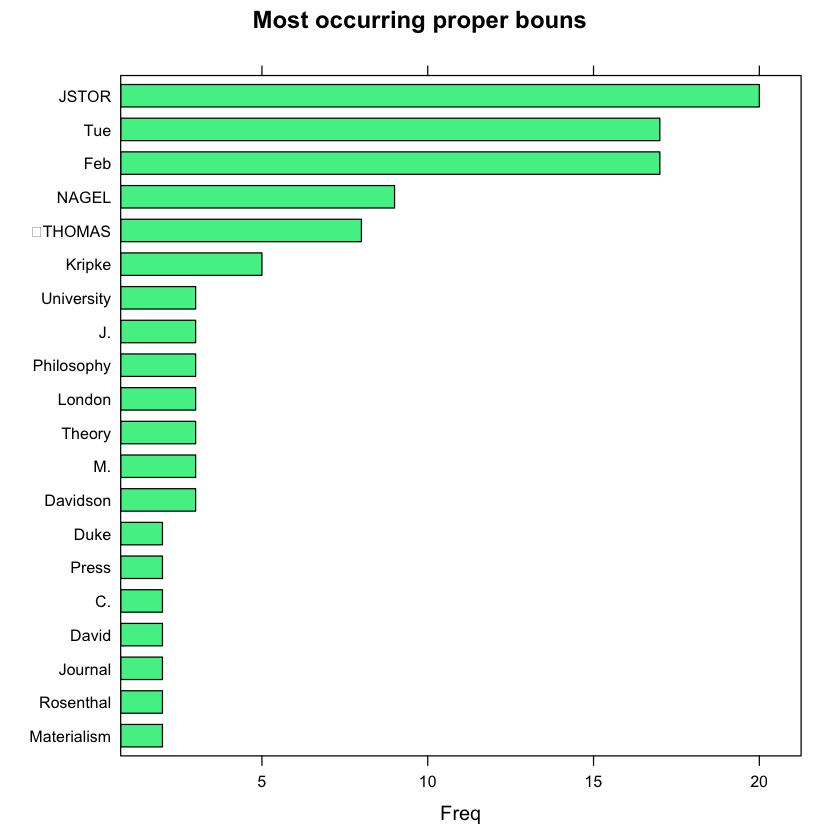

In [14]:
## Top most occurring proper nouns

oldw <- getOption("warn") # exclude warnings
options(warn = -1)

stats <- subset(x, upos %in% c("PROPN")) 
stats <- txt_freq(stats$token)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = head(stats, 20), col = "seagreen2", 
         main = "Most occurring proper bouns", xlab = "Freq")

# write graph to image
png(filename="results/essay_bar_tf_propernouns.png")
barchart(key ~ freq, data = head(stats, 20), col = "seagreen2", 
         main = "Most occurring proper bouns", xlab = "Freq")
dev.off()

options(warn = oldw) # turn warnings back on

pdf 
  2

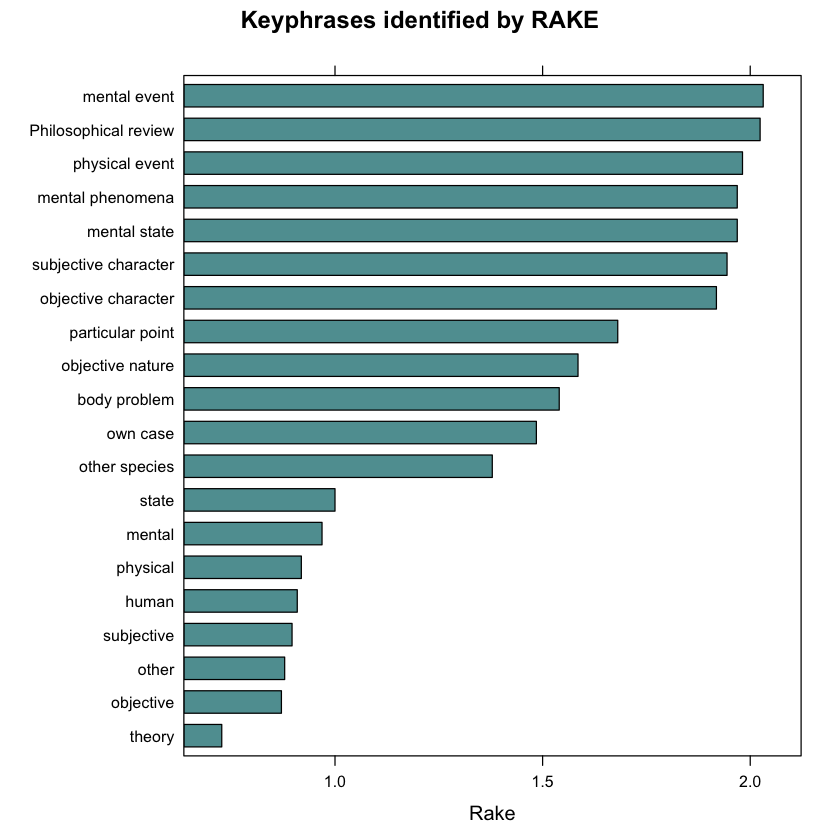

In [15]:
## RAKE (Rapid Automatic Keyword Extraction)
# between nouns and adjectives
# uses TF and co-occurrence frequency
stats <- keywords_rake(x = x, term = "lemma", group = "doc_id", 
                       relevant = x$upos %in% c("NOUN", "ADJ")) # excludes stop words
stats$key <- factor(stats$keyword, levels = rev(stats$keyword))
barchart(key ~ rake, data = head(subset(stats, freq > 3), 20), col = "cadetblue", 
         main = "Keyphrases identified by RAKE", 
         xlab = "Rake")


# write graph to image
png(filename="results/essay_bar_rake_keywords.png")
barchart(key ~ rake, data = head(subset(stats, freq > 3), 20), col = "cadetblue", 
         main = "Keyphrases identified by RAKE", 
         xlab = "Rake")
dev.off()

In [16]:
# format co-occurrences of nouns and adjectives within sentences
cooc <- cooccurrence(x = subset(x, upos %in% c("NOUN", "ADJ")),
                    term = "lemma",
                    group = c("doc_id", "paragraph_id", "sentence_id"))
head(cooc) # how many times these terms cooccur

write.csv(cooc,"results/essay_cooc_within_sentence_freq.csv")

term1,term2,cooc
<chr>,<chr>,<dbl>
point,view,31
event,mental,21
mental,physical,21
mind,problem,19
content,pm,17
mental,state,17


pdf 
  2

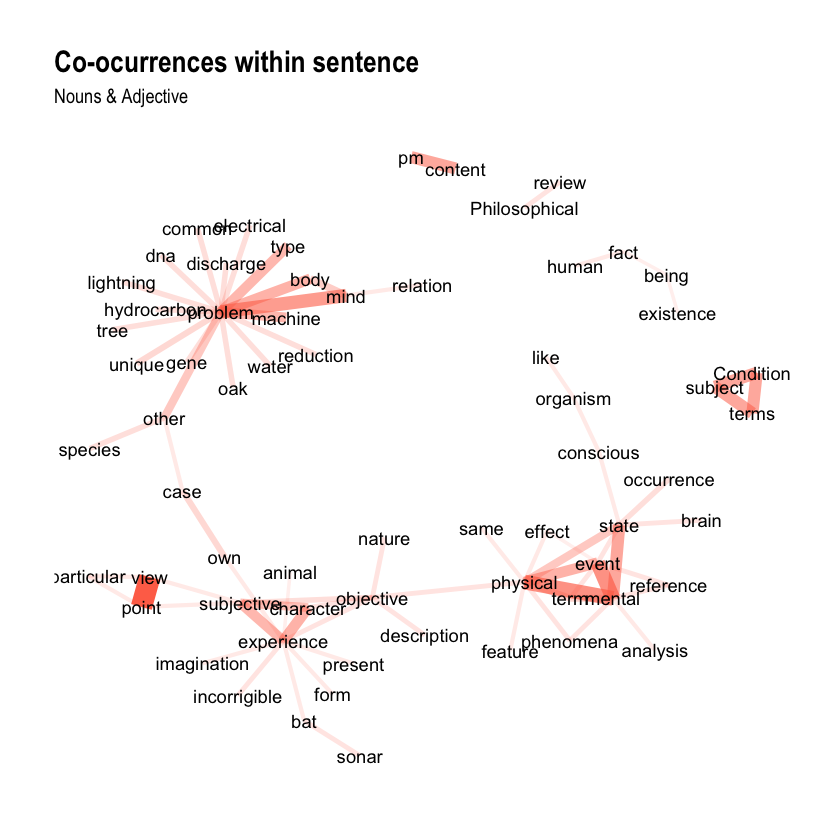

In [17]:
# co-occurrence network graph - Co-occurrences of Nouns and Adjectives within sentences
oldw <- getOption("warn") # exclude warnings
options(warn = -1)

wordnetwork <- head(cooc, 75) # how many cooccurrences
wordnetwork <- graph_from_data_frame(wordnetwork)

# write graph to image
png(filename="results/essay_cooc_words_same_sentence.png")
ggraph(wordnetwork, layout = "fr") + 
    geom_edge_link(aes(width = cooc, edge_alpha = cooc), edge_colour = "coral1") +
    geom_node_text(aes(label = name), col = "black", sizee = 4) +
    theme_graph(base_family = "Arial Narrow") +
    theme(legend.position = "none") + 
    labs(title = "Co-ocurrences within sentence", subtitle = "Nouns & Adjective")
dev.off()

ggraph(wordnetwork, layout = "fr") + 
    geom_edge_link(aes(width = cooc, edge_alpha = cooc), edge_colour = "coral1") +
    geom_node_text(aes(label = name), col = "black", sizee = 4) +
    theme_graph(base_family = "Arial Narrow") +
    theme(legend.position = "none") + 
    labs(title = "Co-ocurrences within sentence", subtitle = "Nouns & Adjective")

options(warn = oldw) # turn warnings back on

pdf 
  2

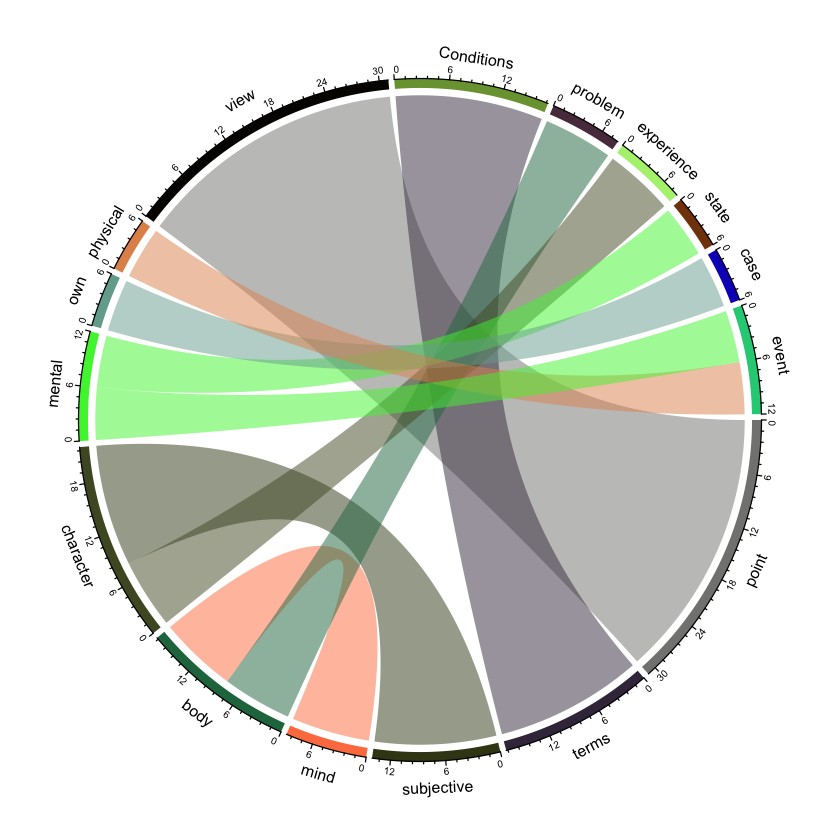

In [18]:
# chord diagram of top 10 cooccurrences of nouns and adjectives in the same sentence
cooccur <- cooccurrence(x$lemma, relevant = x$upos %in% c("NOUN", "ADJ"), skipgram = 1)
cooccur = head(cooccur, 10)
chordDiagram(cooccur)

# write graph to image
png(filename="results/essay_chord_words_same_sentence.png")
chordDiagram(cooccur)
dev.off()

In [19]:
## format coocurrences of nouns and adjectives following one another
cooc <- cooccurrence(x$lemma, relevant = x$upos %in% c("NOUN", "ADJ"), skipgram = 1)
head(cooc)

write.csv(cooc,"results/essay_cooc_words_following_freq.csv")

term1,term2,cooc
<chr>,<chr>,<int>
point,view,31
terms,Conditions,17
subjective,character,14
mind,body,9
body,problem,8
character,experience,8


pdf 
  2

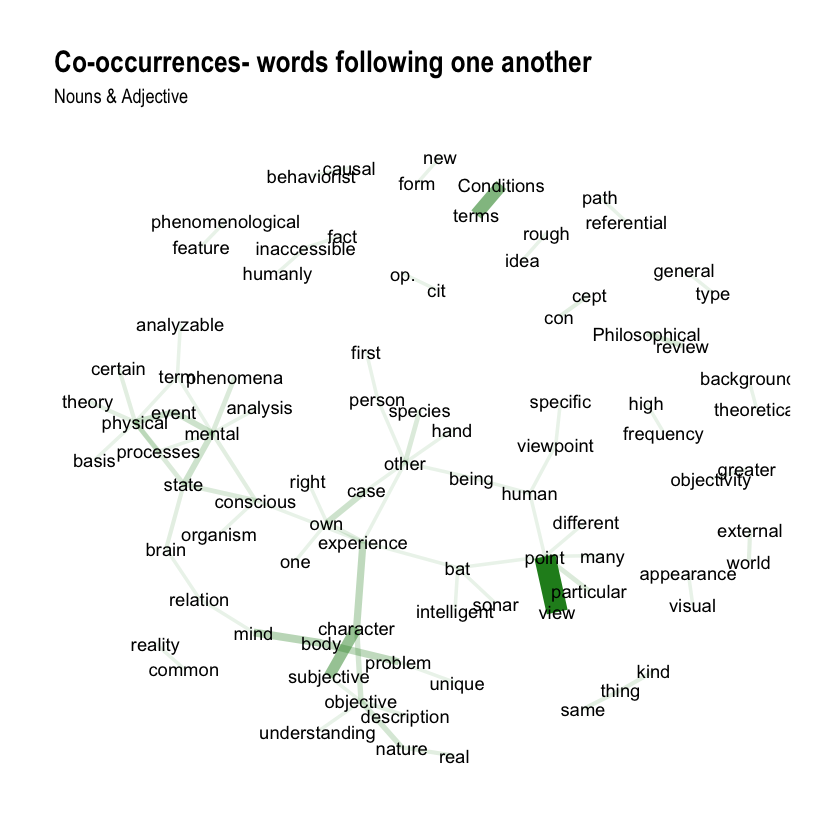

In [20]:
# graph coocurrences of nouns and adjectives following one another

oldw <- getOption("warn") # exclude warnings
options(warn = -1)

wordnetwork <- head(cooc, 75)
wordnetwork <- graph_from_data_frame(wordnetwork)

ggraph(wordnetwork, layout = "fr") + 
    geom_edge_link(aes(width = cooc, edge_alpha = cooc), edge_colour = "forestgreen") +
    geom_node_text(aes(label = name), col = "black", sizee = 4) +
    theme_graph(base_family = "Arial Narrow") +
    theme(legend.position = "none") + 
    labs(title = "Co-occurrences- words following one another", subtitle = "Nouns & Adjective")

# write following graph to image
png(filename="results/essay_cooc-words-following.png") 
ggraph(wordnetwork, layout = "fr") + 
    geom_edge_link(aes(width = cooc, edge_alpha = cooc), edge_colour = "forestgreen") +
    geom_node_text(aes(label = name), col = "black", sizee = 4) +
    theme_graph(base_family = "Arial Narrow") +
    theme(legend.position = "none") + 
    labs(title = "Co-occurrences- words following one another", subtitle = "Nouns & Adjective")
dev.off()

options(warn = oldw) # turn warnings back on

pdf 
  2

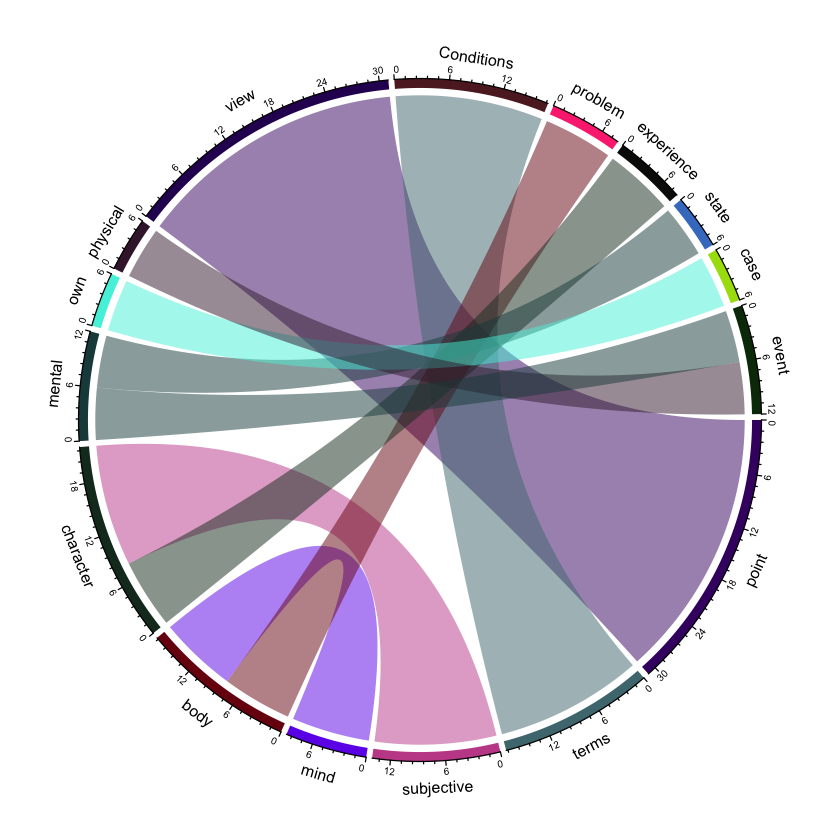

In [21]:
# chord diagram of top 10 cooccurrences of nouns and adjectives following each other
cooccur2 <- cooccurrence(x$lemma, relevant = x$upos %in% c("NOUN", "ADJ"), skipgram = 1)
cooccur2 = head(cooccur2, 10) # top 10 cooccurrences of nouns and adjectives following each other
chordDiagram(cooccur2)

# write graph to image
png(filename="results/essay_chord_words_following.png")
chordDiagram(cooccur2)
dev.off()

In [22]:
################ WORD COUNTS AND SENTIMENT ANALYSIS OF THE PHILOSOPHICAL ESSAY

In [116]:
df <- as.data.frame.matrix(essay)

df <- mutate(df, Philosophical.Review = gsub(x = Philosophical.Review, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

head(df)

Philosophical.Review
<chr>
What Is It Like to Be a Bat
Author Thomas Nagel
Source The Philosophical Review Vol No pp
Published by Duke University Press on behalf of Philosophical Review
Stable URL httpwwwjstororgstable
Accessed


In [117]:
tidy_text <- df %>% 
    unnest_tokens(word, Philosophical.Review) %>% # tokenize
    anti_join(stop_words) # exclude 

Joining, by = "word"



In [118]:
head(tidy_text)

word
<chr>
bat
author
thomas
nagel
source
philosophical


In [119]:
# word count
word_count <- tidy_text %>%
    count(word, sort = TRUE)
write.csv(word_count,"results/essay_word_count_freq.csv")

Joining, by = "word"

Joining, by = "word"



pdf 
  2

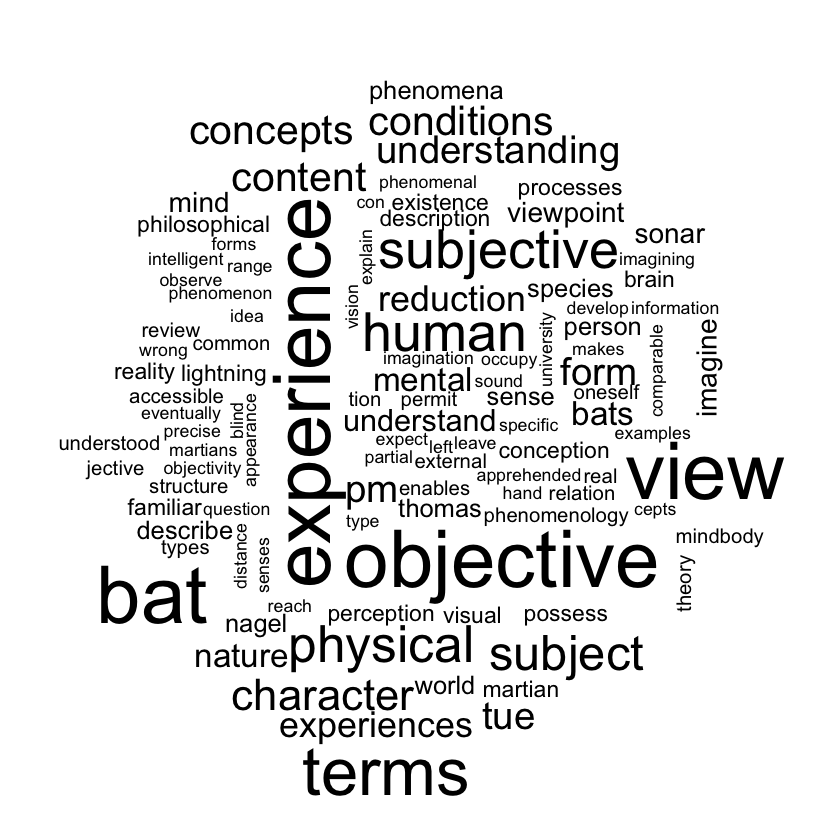

In [138]:
# word count unigram word cloud without stop words, regardless of sentiment

oldw <- getOption("warn") # exclude warnings
options(warn = -1)

tidy_text %>%
    anti_join(stop_words) %>% # exclude stop words
    filter(!word %in% c(stop_words$word, "jstor")) %>%
    filter(!word %in% c(stop_words$word, "downloaded")) %>%
    filter(!word %in% c(stop_words$word, "feb")) %>%
    count(word, sort = TRUE) %>%
    with(wordcloud(word, n, mx.words = 150))

# write graph to image
png(filename="results/essay_word_count_word_cloud.png")
tidy_text %>%
    anti_join(stop_words) %>% # exclude stop words
    filter(!word %in% c(stop_words$word, "jstor")) %>%
    filter(!word %in% c(stop_words$word, "downloaded")) %>%
    filter(!word %in% c(stop_words$word, "feb")) %>%
    count(word, sort = TRUE) %>%
    with(wordcloud(word, n, mx.words = 150))
dev.off()

options(warn = oldw) # turn warnings back on

In [139]:
# bigrams
tidy_bigrams <- df %>%
  unnest_tokens(bigram, Philosophical.Review, token = "ngrams", n = 2)

bigrams_separated <- tidy_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")

bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word) %>%
  filter(!word1 %in% c(stop_words$word, "jstor")) %>%
  filter(!word2 %in% c(stop_words$word, "jstor")) %>%
  filter(!word1 %in% c(stop_words$word, "downloaded")) %>%
  filter(!word2 %in% c(stop_words$word, "downloaded")) %>%
  filter(!word1 %in% c(stop_words$word, "feb")) %>%
  filter(!word2 %in% c(stop_words$word, "feb"))

bigrams_united <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")

head(bigrams_united)

bigram
<chr>
bat author
author thomas
thomas nagel
nagel source
philosophical review
review vol


pdf 
  2

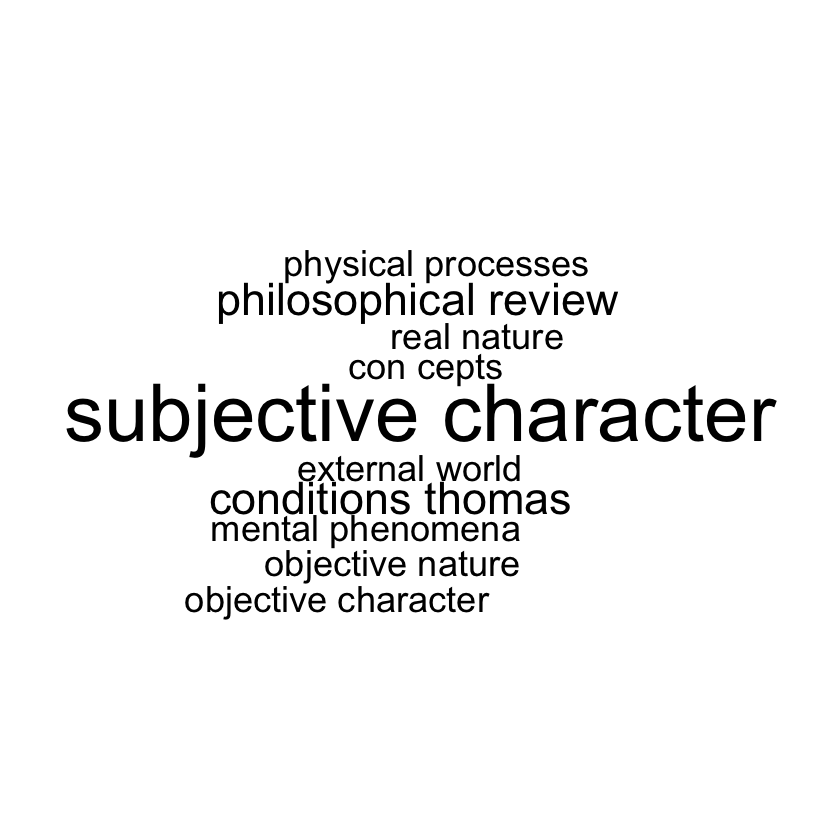

In [140]:
oldw <- getOption("warn") # exclude warnings
options(warn = -1)

bigrams_united %>%
    count(bigram, sort = TRUE) %>%
    with(wordcloud(bigram, n, mx.words = 150))

# write graph to image
png(filename="results/essay_bigram_word_cloud.png")
bigrams_united %>%
    count(bigram, sort = TRUE) %>%
    with(wordcloud(bigram, n, mx.words = 100))
dev.off()

options(warn = oldw) # turn warnings back on

In [141]:
# bing (lexicon) word count
bing_word_count <- word_count %>%
    inner_join(get_sentiments("bing")) %>%
    count(word, sentiment, sort = TRUE) %>%
    ungroup()

head(bing_word_count)

Joining, by = "word"



word,sentiment,n
<chr>,<chr>,<int>
accessible,positive,1
accomplished,positive,1
accurate,positive,1
afford,positive,1
blind,negative,1
cloud,negative,1


Joining, by = "word"

Joining, by = "word"



pdf 
  2

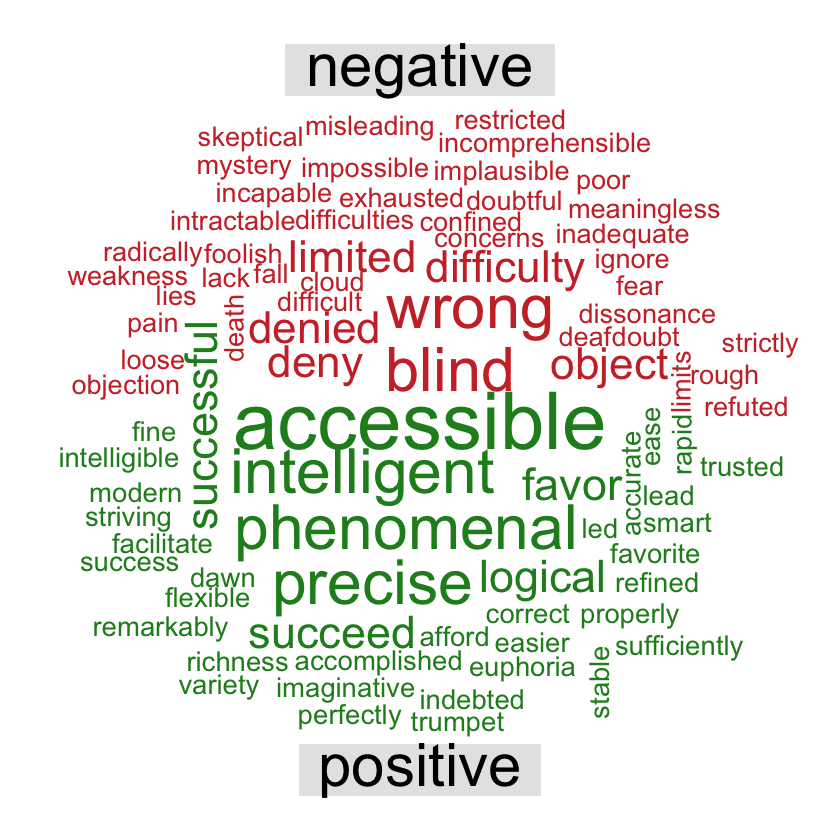

In [142]:
# bing sentiment word cloud

oldw <- getOption("warn") # exclude warnings
options(warn = -1)

bing_sentiment_word_cloud <- tidy_text %>%
    inner_join(get_sentiments("bing")) %>%
    count(word, sentiment, sort = TRUE) %>%
    acast(word ~ sentiment, value.var = "n", fill = 0) %>%
    comparison.cloud(colors = c("brown3", "forestgreen"),
                    max.words = 100)

# write graph to image
png(filename="results/essay_sentiment_word_count_word_cloud.png")
bing_sentiment_word_cloud <- tidy_text %>%
    inner_join(get_sentiments("bing")) %>%
    count(word, sentiment, sort = TRUE) %>%
    acast(word ~ sentiment, value.var = "n", fill = 0) %>%
    comparison.cloud(colors = c("brown3", "forestgreen"),
                    max.words = 100)
dev.off()

options(warn = oldw) # turn warnings back on

In [143]:
### TF-IDF

# read in lines of philosophy essay for tfidf, etc.
fileName <- "data/nagel_bat.txt"
con <- file(fileName,open="r")
line <- readLines(con)
close(con)

df2 <- data.frame(line, stringsAsFactors = FALSE)

df2 = df2 %>% filter_all(any_vars(!is.na(.)))
df2 = df2 %>% filter_all(any_vars(complete.cases(.)))  

# add row number col for lines
df2$ID <- seq.int(nrow(df2)) # ID = row number/line number
#head(line)


# eliminate numeric characters, symbols, etc.
df2 <- mutate(df2, line = gsub(x = line, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

In [144]:


essay_words <- df2 %>%
  unnest_tokens(word, line) %>%
  count(ID, word, sort = TRUE)

total_words <- essay_words %>% 
  group_by(ID) %>%  
  summarize(total = sum(n))

essay_words <- left_join(essay_words, total_words)

#head(essay_words)

Joining, by = "ID"



In [145]:
# zipf's law
freq_by_rank <- essay_words %>% 
  group_by(ID) %>% 
  mutate(rank = row_number(), 
         `term frequency` = n/total)

head(freq_by_rank)

ID,word,n,total,rank,term frequency
<int>,<chr>,<int>,<int>,<int>,<dbl>
10,of,3,17,1,0.1764706
170,the,3,10,1,0.3000000
213,is,3,15,1,0.2000000
375,a,3,16,1,0.1875000
398,the,3,15,1,0.2000000
430,a,3,19,1,0.1578947


In [146]:
# decreases the weight of common words, and increases the weight for more rare words
essay_words <- essay_words %>%
  bind_tf_idf(word, ID, n)

essay_words %>%
  select(-total) %>%
  arrange(desc(tf_idf))

head(essay_words)
write.csv(cooc,"results/essay_tfidf.csv")

ID,word,n,tf,idf,tf_idf
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
8,accessed,1,1.0000000,6.501290,6.501290
11,httpwwwjstororgpageinfoaboutpoliciestermsjsp,1,1.0000000,6.501290,6.501290
23,httpwwwjstororg,1,1.0000000,6.501290,6.501290
67,lxxix,1,1.0000000,6.501290,6.501290
70,synthese,1,1.0000000,6.501290,6.501290
102,future,1,1.0000000,5.808142,5.808142
612,discovered,1,1.0000000,5.402677,5.402677
738,materialism,1,1.0000000,4.891852,4.891852
31,consciousness,1,1.0000000,4.555380,4.555380


ID,word,n,total,tf,idf,tf_idf
<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
10,of,3,17,0.1764706,0.9718606,0.1715048
170,the,3,10,0.3000000,0.8314087,0.2494226
213,is,3,15,0.2000000,1.4643371,0.2928674
375,a,3,16,0.1875000,1.4386946,0.2697552
398,the,3,15,0.2000000,0.8314087,0.1662817
430,a,3,19,0.1578947,1.4386946,0.2271623
